In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  c:\RAI\fairness-variance-latest\fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'eq_odds_postprocessing'
DATASET_NAME = 'Credit_Card_Default'
#EXPERIMENT_SESSION_UUID = 'b9097738-fb81-4099-bc79-c9e117db88dc'
EXPERIMENT_SESSION_UUID = "acafb64d-0b5a-4b37-bd3c-bd234d2ab800"
SENSITIVE_ATTRS = ['sex']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(150, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 19:43:37.476,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_1,100,...,"[1.0, 0.0]",1.0,0.810017,0.818182,NaN,NaN,0.798021,NaN,NaN,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 20:20:41.640,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_1,100,...,"[1.0, 0.0]",0.0,0.816361,0.823232,1.000000,0.000000,0.806265,1.000000,0.000000,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 20:59:17.169,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_2,200,...,"[1.0, 0.0]",1.0,0.810351,0.815987,NaN,NaN,0.801061,NaN,NaN,0
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 21:35:00.602,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_2,200,...,"[1.0, 0.0]",0.0,0.812688,0.823498,1.000000,0.000000,0.794872,1.000000,0.000000,0
4,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 22:15:26.142,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_3,300,...,"[1.0, 0.0]",1.0,0.824708,0.827208,NaN,NaN,0.820819,NaN,NaN,0
5,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 22:50:16.010,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_3,300,...,"[1.0, 0.0]",0.0,0.832721,0.838727,1.000000,0.000000,0.823379,1.000000,0.000000,0
6,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-01 23:27:16.163,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_4,400,...,"[1.0, 0.0]",1.0,0.814357,0.834908,NaN,NaN,0.783445,NaN,NaN,0
7,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-02 00:02:03.031,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_4,400,...,"[1.0, 0.0]",0.0,0.818698,0.839355,1.000000,0.000000,0.787625,1.000000,0.000000,0
8,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-02 00:38:51.060,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_5,500,...,"[1.0, 0.0]",1.0,0.823706,0.837541,NaN,NaN,0.802217,NaN,NaN,0
9,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Credit_Card_Default,200,OK,2023-11-02 01:13:37.380,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,Exp_iter_5,500,...,"[1.0, 0.0]",0.0,0.828715,0.844127,1.000000,0.000000,0.804774,1.000000,0.000000,0


In [11]:
df = models_metrics_dct[list(models_metrics_dct.keys())[0]]
df[(df.Metric == 'Accuracy') & (df.Experiment_Iteration == 'Exp_iter_1')].T

,0,1
Metric,Accuracy,Accuracy
Model_Name,RandomForestClassifier,RandomForestClassifier
Model_Params,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Dataset_Name,Credit_Card_Default,Credit_Card_Default
Num_Estimators,200,200
Tag,OK,OK
Record_Create_Date_Time,2023-11-01 19:43:37.476000,2023-11-01 20:20:41.640000
Session_Uuid,acafb64d-0b5a-4b37-bd3c-bd234d2ab800,acafb64d-0b5a-4b37-bd3c-bd234d2ab800
Experiment_Iteration,Exp_iter_1,Exp_iter_1
Dataset_Split_Seed,100,100


In [12]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [15]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 1) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
77,Label_Stability,Exp_iter_1,0.982327
77,Label_Stability,Exp_iter_2,0.999553
77,Label_Stability,Exp_iter_3,0.999513
77,Label_Stability,Exp_iter_4,0.999499
77,Label_Stability,Exp_iter_5,0.988611


In [16]:
test_df["Subgroup"].unique()

array(['sex_dis', 'sex_dis_correct', 'sex_dis_incorrect', 'sex_priv',
       'sex_priv_correct', 'sex_priv_incorrect', 'overall'], dtype=object)

In [17]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 0) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
115,Label_Stability,Exp_iter_1,0.945456
115,Label_Stability,Exp_iter_2,0.941119
115,Label_Stability,Exp_iter_3,0.939750
115,Label_Stability,Exp_iter_4,0.936952
115,Label_Stability,Exp_iter_5,0.943065


In [18]:
melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"]= melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"].astype(bool)

<Figure size 1200x600 with 0 Axes>

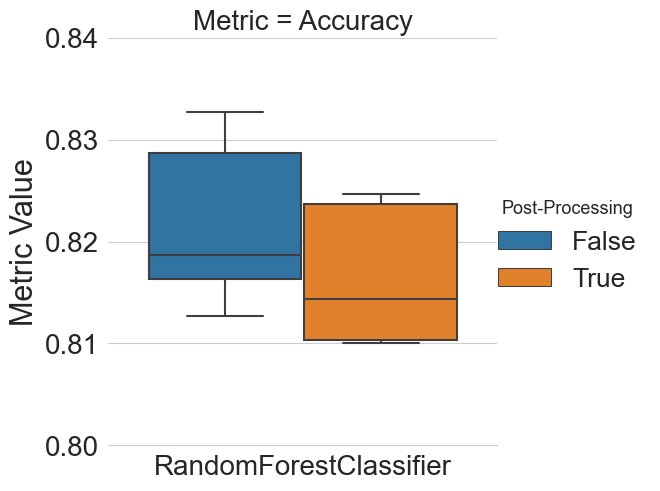

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.8, 0.84),
                                           metric_names=['Accuracy'],
                                           )

<Figure size 1200x600 with 0 Axes>

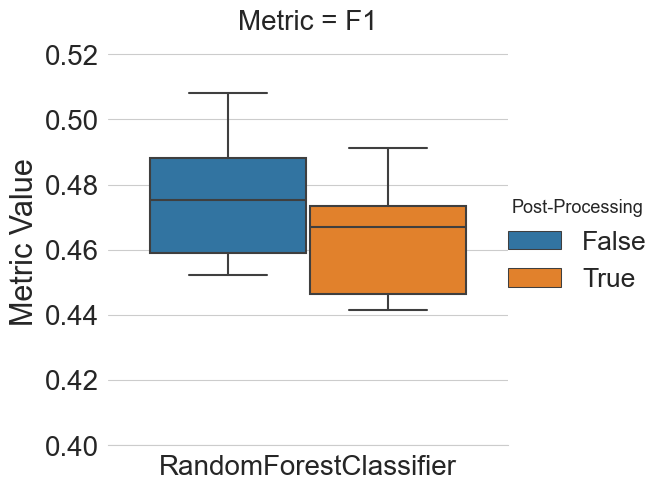

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.40, 0.525),
                                           metric_names=['F1'],
                                           )

<Figure size 1200x600 with 0 Axes>

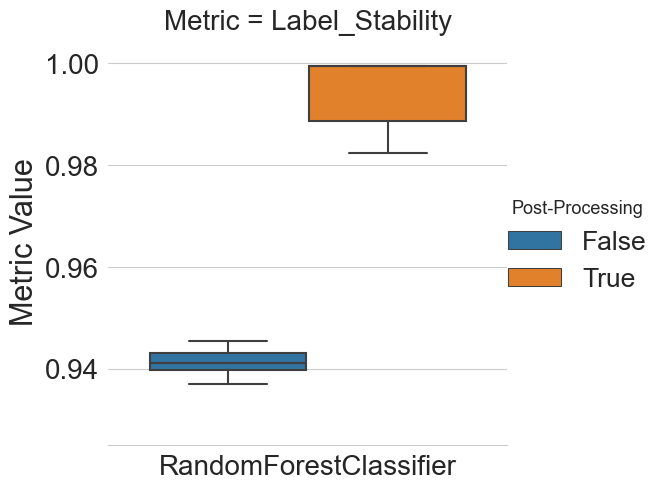

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.925, 1.005),
                                           metric_names=['Label_Stability'])

<Figure size 1200x600 with 0 Axes>

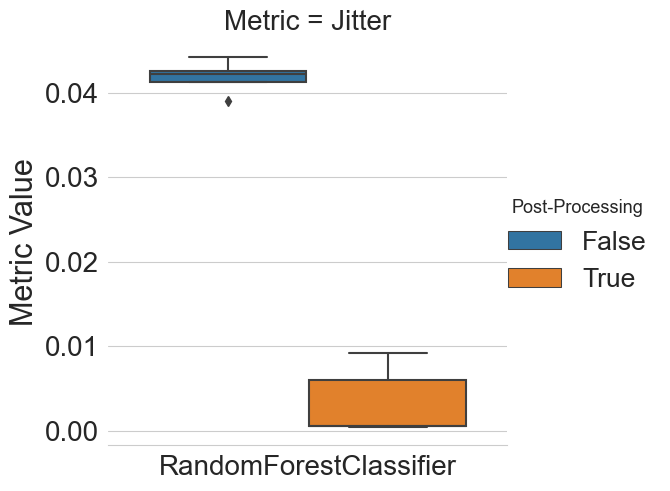

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Jitter'])

<Figure size 1200x600 with 0 Axes>

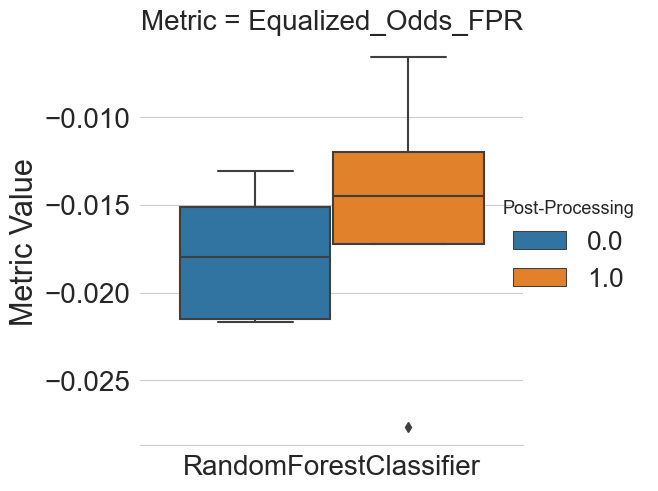

In [23]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR'])

<Figure size 1200x600 with 0 Axes>

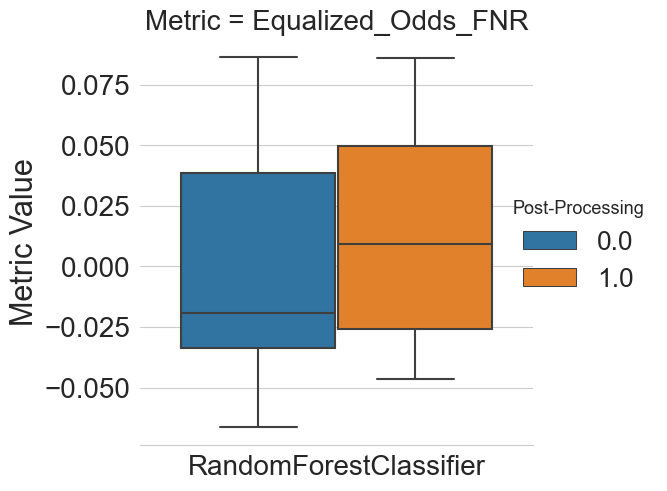

In [24]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FNR'])

<Figure size 1200x600 with 0 Axes>

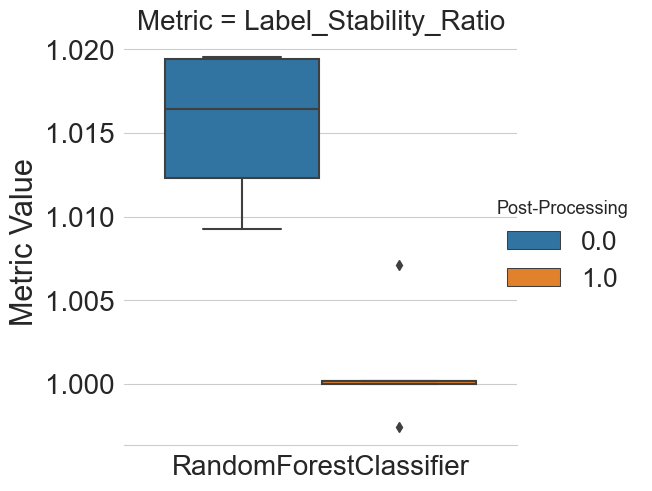

In [25]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Ratio'])